# Heirarchial clustering practice
"In this Shopping datasets we have 200 instances and 8 features.But for simplicty we will only take only 2 features CreditScore and SpendingScore. We will the cluster the data using Heirarchial clustering algorithm "


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"Below is the first 5 rows of the data"

In [2]:
data=pd.read_csv('Module 5_Shopping_CustomerData.csv')
df=pd.DataFrame(data)
df.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [4]:
df.shape

(200, 8)

"we can see how much spread in each columns in the datasets"

In [14]:
df.describe()

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


"luckily we don't have any null values.So,it saves our time"

In [15]:
df.isnull().sum()

CustomerID        0
CustomerGender    0
CustomerAge       0
CustomerCity      0
AnnualIncome      0
CreditScore       0
SpendingScore     0
CustomerCityID    0
dtype: int64

"we will use and predict only 2 features for now"

In [16]:
new_df=df[['CreditScore','SpendingScore']]
new_df.head()

,CreditScore,SpendingScore
0,653,78
1,630,63
2,555,69
3,699,30
4,793,6


"you can see CreditScore and SpendingScore the values is much much differ.It will cause prediction biased toward higher value " 

In [17]:
from sklearn.preprocessing import StandardScaler
stdscalar=StandardScaler()
scaled_df=stdscalar.fit_transform(new_df)

"so we standardized the features"

In [18]:
new_data=pd.DataFrame(scaled_df,columns=['CreditScore','SpendingScore'])
new_data.head()

,CreditScore,SpendingScore
0,-0.642037,0.952679
1,-0.862520,0.429133
2,-1.581486,0.638551
3,-0.201071,-0.722668
4,0.700033,-1.560341


# Below is the Dendrogram diagram using scipy library

"we can see 3 clusters forming but we have to set threeshold"
"Dendrogram lines are the distance from one clusters to others"

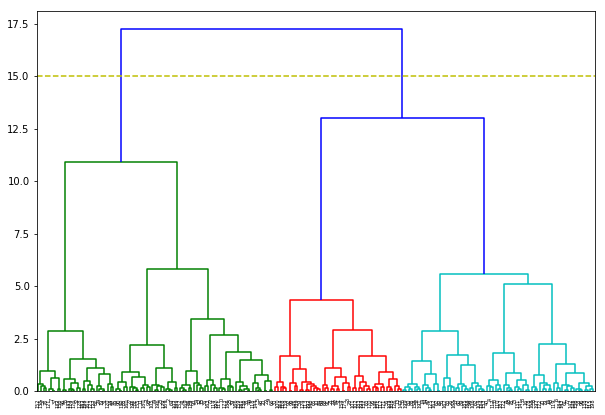

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7)) 
z=shc.dendrogram(shc.linkage(new_data,method='ward'))
plt.axhline(y=15,c='y',linestyle='--')

"we have set 3 clusters"

In [29]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=3).fit(new_data)
agg.labels_

array([0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1,
       0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1,
       1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1,
       2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 2,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1,
       1, 1])

#visualizing the labels on Scatterplot
"we can see how datapoints are cluster according to dendrogram algorithm"

Text(0, 0.5, 'SpendingScore')

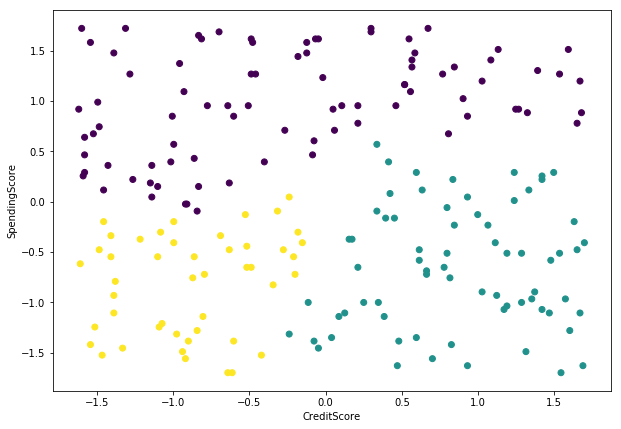

In [31]:
plt.figure(figsize=(10, 7))  
plt.scatter(new_data['CreditScore'],new_data['SpendingScore'],c=agg.labels_)
plt.xlabel('CreditScore')
plt.ylabel('SpendingScore')